# Import Necessary Libraries

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize Dataset

In [334]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Check Dataset

In [335]:
df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200            NaN  
1           125/80          75        10000            NaN  
2           125/80          75        10000            NaN  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

Check for null values

In [336]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Supplement the null values with string value "None"

In [337]:
df.fillna("None", inplace=True)

df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

# Manipulating the Dataset

 Feature Engineering: Splitting Blood Pressure to Systolic and Diastolic BP, Categorizing Blood Pressure Levels, and getting the Pulse Pressure

In [338]:
def extract_systolic_diastolic(bp_str):
  try:
    systolic, diastolic = map(int, bp_str.split('/'))
    return systolic, diastolic
  except:
    return None, None

df['SystolicBP'], df['DiastolicBP'] = zip(*df['Blood Pressure'].map(extract_systolic_diastolic))
df['Pulse Pressure'] = df['SystolicBP'] - df['DiastolicBP']

def categorize_blood_pressure(systolic, diastolic):
  if systolic < 120 and diastolic < 80:
    return 'Normal'
  elif systolic < 130 and diastolic < 80:
    return 'Elevated'
  elif systolic < 140 or diastolic < 90:
    return 'Stage 1 Hypertension'
  else:
    return 'Stage 2 Hypertension'

df['BloodPressureCategory'] = df.apply(lambda row: categorize_blood_pressure(row['SystolicBP'], row['DiastolicBP']), axis=1)

# Mapping Columns with String Values

Check columns with string values

In [339]:
for column in df.columns:
  unique_count = df[column].nunique()
  if df[column].dtype == object:
    print(f"Column '{column}' has {unique_count} string values.")

Column 'Gender' has 2 string values.
Column 'Occupation' has 11 string values.
Column 'BMI Category' has 4 string values.
Column 'Blood Pressure' has 25 string values.
Column 'Sleep Disorder' has 3 string values.
Column 'BloodPressureCategory' has 4 string values.


Map the columns

In [340]:
for column in df.columns:
  if df[column].dtype == object:
    unique_values = df[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}

    df[column] = df[column].map(mapping)

    print(f"Column '{column}' has been mapped to integer values.")

Column 'Gender' has been mapped to integer values.
Column 'Occupation' has been mapped to integer values.
Column 'BMI Category' has been mapped to integer values.
Column 'Blood Pressure' has been mapped to integer values.
Column 'Sleep Disorder' has been mapped to integer values.
Column 'BloodPressureCategory' has been mapped to integer values.


In [341]:
df

Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       0   27           0             6.1                 6   
1            2       0   28           1             6.2                 6   
2            3       0   28           1             6.2                 6   
3            4       0   28           2             5.9                 4   
4            5       0   28           2             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       1   59           4             8.1                 9   
370        371       1   59           4             8.0                 9   
371        372       1   59           4             8.1                 9   
372        373       1   59           4             8.1                 9   
373        374       1   59           4             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                         42             6             0               0   
1                         60             8             1               1   
2                         60             8             1               1   
3                         30             8             2               2   
4                         30             8             2               2   
..                       ...           ...           ...             ...   
369                       75             3             0              22   
370                       75             3             0              22   
371                       75             3             0              22   
372                       75             3             0              22   
373                       75             3             0              22   

     Heart Rate  Daily Steps  Sleep Disorder  SystolicBP  DiastolicBP  \
0            77         4200               0         126           83   
1            75        10000               0         125           80   
2            75        10000               0         125           80   
3            85         3000               1         140           90   
4            85         3000               1         140           90   
..          ...          ...             ...         ...          ...   
369          68         7000               1         140           95   
370          68         7000               1         140           95   
371          68         7000               1         140           95   
372          68         7000               1         140           95   
373          68         7000               1         140           95   

     Pulse Pressure  BloodPressureCategory  
0                43                      0  
1                45                      0  
2                45                      0  
3                50                      1  
4                50                      1  
..              ...                    ...  
369              45                      1  
370              45                      1  
371              45                      1  
372              45                      1  
373              45                      1  

[374 rows x 17 columns]

# Getting the feature importance and correlation of each colum


In [342]:
df = df.drop('Person ID', axis=1)
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Getting feature importance

                    Feature  Importance
12              DiastolicBP    0.156167
11               SystolicBP    0.154611
7              BMI Category    0.123069
3            Sleep Duration    0.111854
8            Blood Pressure    0.101750
1                       Age    0.079004
10              Daily Steps    0.045377
5   Physical Activity Level    0.044464
9                Heart Rate    0.040510
4          Quality of Sleep    0.036319
14    BloodPressureCategory    0.028310
6              Stress Level    0.027934
2                Occupation    0.027724
13           Pulse Pressure    0.017219
0                    Gender    0.005687


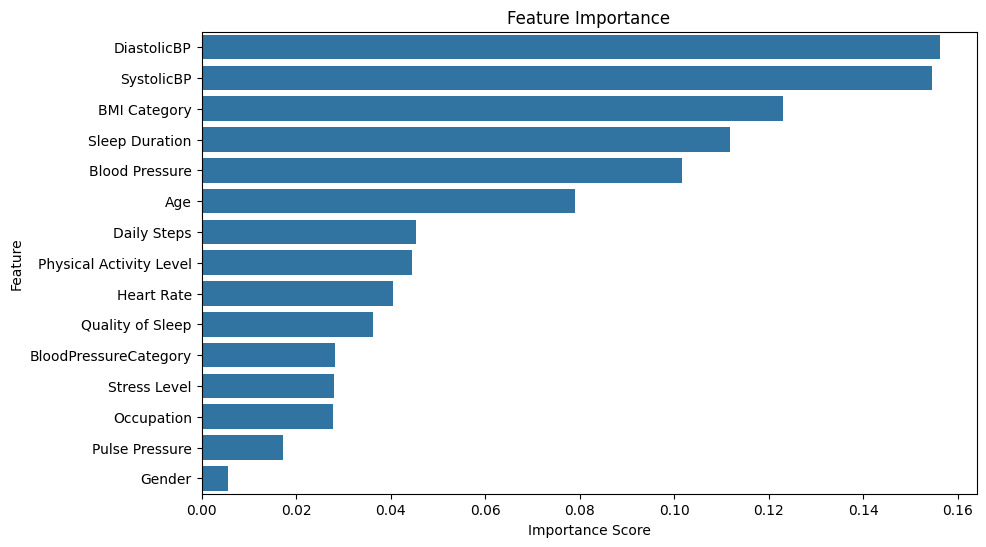

In [343]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

Getting correlation matrix

                           Gender       Age  Occupation  Sleep Duration  \
Gender                   1.000000  0.596358   -0.051814        0.121579   
Age                      0.596358  1.000000    0.238178        0.344709   
Occupation              -0.051814  0.238178    1.000000        0.047936   
Sleep Duration           0.121579  0.344709    0.047936        1.000000   
Quality of Sleep         0.291366  0.473734    0.142654        0.883213   
Physical Activity Level -0.001454  0.178993    0.036028        0.212360   
Stress Level            -0.396018 -0.422344   -0.124260       -0.811023   
BMI Category            -0.207038 -0.423270   -0.150854        0.266077   
Blood Pressure           0.360281  0.590604    0.285584       -0.114696   
Heart Rate              -0.217105 -0.225606   -0.069921       -0.516455   
Daily Steps              0.014509  0.057973    0.014516       -0.039533   
Sleep Disorder           0.161131  0.303962    0.162914       -0.382045   
SystolicBP               

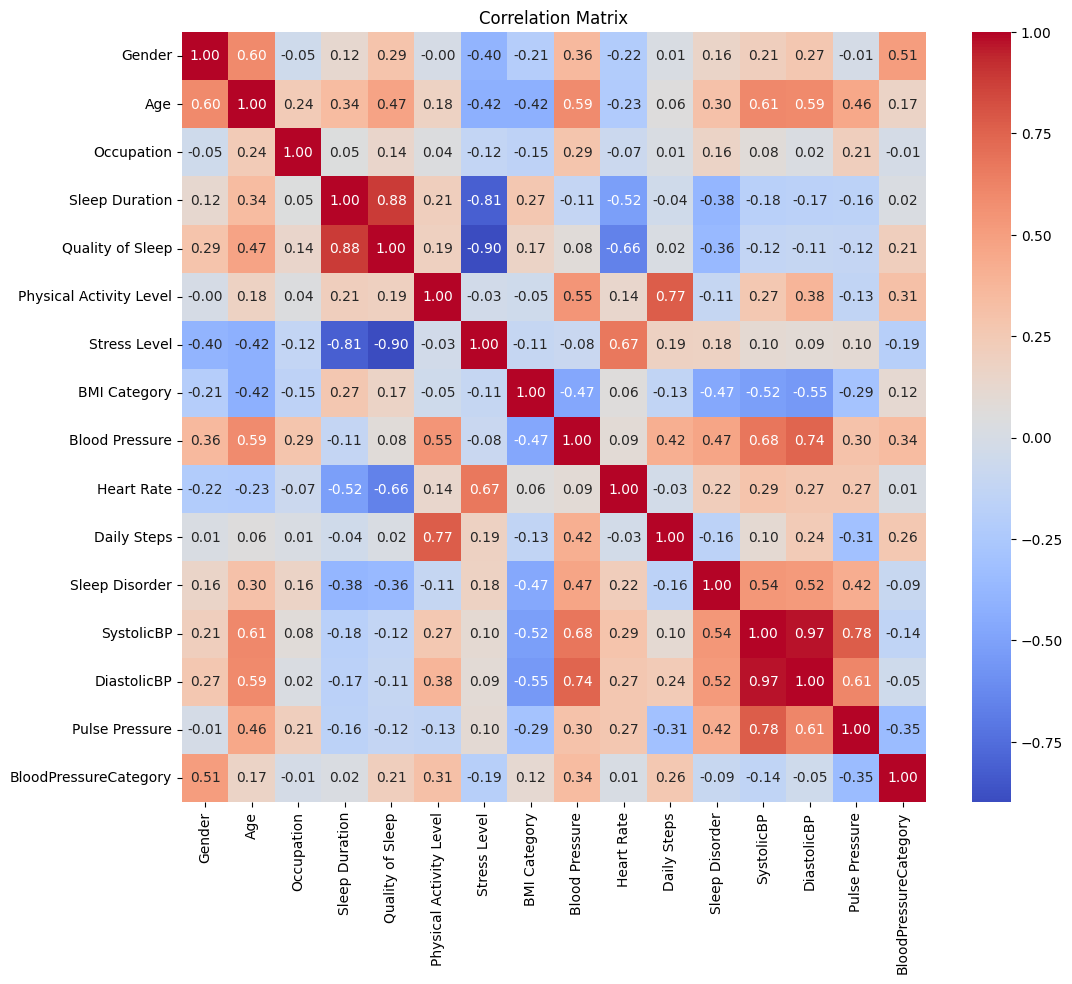

In [344]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Getting the baseline for the accuracy, precision, recall, and F1-score

Getting the best model using Grid Search

In [345]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
rf_model = grid_search.best_estimator_

In [346]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.88
Precision: 0.8818596218596219
Recall: 0.88
F1-Score: 0.8785395537525356


# Dropping redundant columns.

In [347]:
columns_to_keep = ["DiastolicBP", "SystolicBP", "BMI Category", "Sleep Duration", "Blood Pressure", "Age", "Sleep Disorder"]
columns_to_drop = df.columns.tolist()
columns_to_drop

['Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder',
 'SystolicBP',
 'DiastolicBP',
 'Pulse Pressure',
 'BloodPressureCategory']

In [348]:
# Age Sleep Duration Pulse Pressure
columns_to_drop = [x for x in columns_to_drop if x not in columns_to_keep]
df = df.drop(columns_to_drop, axis=1)
df

Age  Sleep Duration  BMI Category  Blood Pressure  Sleep Disorder  \
0     27             6.1             0               0               0   
1     28             6.2             1               1               0   
2     28             6.2             1               1               0   
3     28             5.9             2               2               1   
4     28             5.9             2               2               1   
..   ...             ...           ...             ...             ...   
369   59             8.1             0              22               1   
370   59             8.0             0              22               1   
371   59             8.1             0              22               1   
372   59             8.1             0              22               1   
373   59             8.1             0              22               1   

     SystolicBP  DiastolicBP  
0           126           83  
1           125           80  
2           125           80  
3           140           90  
4           140           90  
..          ...          ...  
369         140           95  
370         140           95  
371         140           95  
372         140           95  
373         140           95  

[374 rows x 7 columns]

# Trying Algorithms

In [349]:
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
score_list = {}

Optimal Values

In [350]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_

KNN

In [351]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=22)

KNN.fit(x_train,y_train)
knn_score = KNN.score(x_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.8666666666666667
Cross-validation scores: [0.64       0.96       1.         0.58666667 0.44594595]
Average cross-validation score: 0.7265225225225225


Logistic Regression

In [352]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)

lr_score = LR.score(x_test,y_test)
score_list["Logistic Regression"] = lr_score

print(f"Score is {lr_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.8666666666666667
Cross-validation scores: [0.64       0.96       1.         0.58666667 0.44594595]
Average cross-validation score: 0.7265225225225225


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes

In [353]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(x_train,y_train)
nbc_score = nbc.score(x_test,y_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.8
Cross-validation scores: [0.64       0.96       1.         0.58666667 0.44594595]
Average cross-validation score: 0.7265225225225225


SVM

In [354]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_score = svc.score(x_test,y_test)
score_list["SVC"] = svc_score
print(f"Score is {svc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.7066666666666667
Cross-validation scores: [0.64       0.96       1.         0.58666667 0.44594595]
Average cross-validation score: 0.7265225225225225


Decision Tree

In [355]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)

dtc_score = dtc.score(x_test,y_test)
score_list["DTC"] = dtc_score
print(f"Score is {dtc_score}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Score is 0.88
Cross-validation scores: [0.64       0.96       1.         0.58666667 0.44594595]
Average cross-validation score: 0.7265225225225225


Check all scores

In [356]:
for model_name, score in score_list.items():
  print(f"{model_name}: {score}")

KNN Classifier: 0.8666666666666667
Logistic Regression: 0.8666666666666667
GaussianNBC: 0.8
SVC: 0.7066666666666667
DTC: 0.88


-- Conclusion, Random Forest Algorithm is the most optimal algorithm for this dataset.

# Getting the final scores

In [357]:
df

Age  Sleep Duration  BMI Category  Blood Pressure  Sleep Disorder  \
0     27             6.1             0               0               0   
1     28             6.2             1               1               0   
2     28             6.2             1               1               0   
3     28             5.9             2               2               1   
4     28             5.9             2               2               1   
..   ...             ...           ...             ...             ...   
369   59             8.1             0              22               1   
370   59             8.0             0              22               1   
371   59             8.1             0              22               1   
372   59             8.1             0              22               1   
373   59             8.1             0              22               1   

     SystolicBP  DiastolicBP  
0           126           83  
1           125           80  
2           125           80  
3           140           90  
4           140           90  
..          ...          ...  
369         140           95  
370         140           95  
371         140           95  
372         140           95  
373         140           95  

[374 rows x 7 columns]

In [358]:
x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [359]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [360]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
rf_model = grid_search.best_estimator_

In [361]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='weighted')

recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.88
Precision: 0.8818596218596219
Recall: 0.88
F1-Score: 0.8785395537525356


# Getting Graphs for Paper

ROC AUC

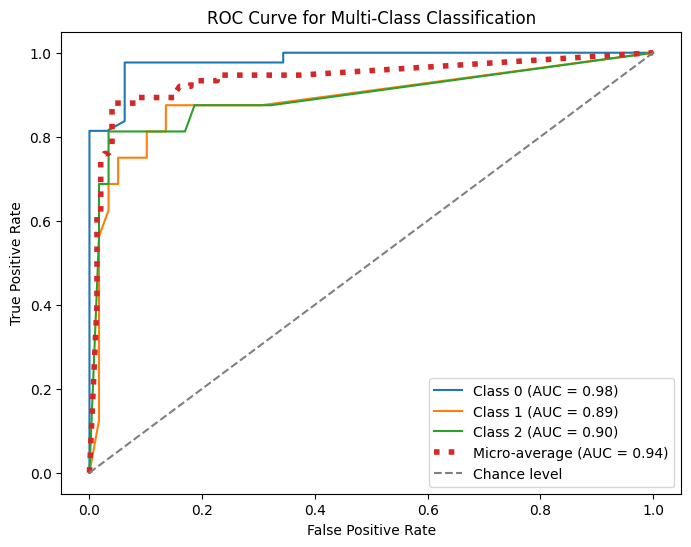

In [362]:
y_test_bin = label_binarize(y_test, classes=rf_model.classes_)
n_classes = y_test_bin.shape[1]

classifier = OneVsRestClassifier(rf_model)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f"Class {rf_model.classes_[i]} (AUC = {roc_auc[i]:.2f})",
    )

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"Micro-average (AUC = {roc_auc['micro']:.2f})",
    linestyle=":",
    linewidth=4,
)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Chance level")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend(loc="lower right")
plt.show()

# Testing the model

Test data yielding 0 or None for the Sleep Disorder

In [363]:
new_data = pd.DataFrame({
    'Age': [30],
    'Sleep Duration': [7],
    'BMI Category': [1],
    'Blood Pressure': [110/70],
    'SystolicBP': [110],
    'DiastolicBP': [70]
})

prediction = rf_model.predict(new_data)

print("Prediction for the new data:", prediction)

Prediction for the new data: [0]


Test data yielding 1 or Insomnia for Sleep Disorder



In [364]:
new_data = pd.DataFrame({
    'Age': [60],
    'Sleep Duration': [5],
    'BMI Category': [2],
    'Blood Pressure': [140/90],
    'SystolicBP': [140],
    'DiastolicBP': [90]
})

prediction = rf_model.predict(new_data)

print("Prediction for the new data:", prediction)

Prediction for the new data: [1]
